# 1. Problem Definition:

In the field of debt collection, accurately identifying statute-barred accounts, which may be unrecoverable, is crucial.

This project aims to create a sophisticated machine-learning model that predicts the likelihood of successfully collecting

debts by analyzing the statute-barred status of each account.

Using a comprehensive dataset containing various attributes like original creditor info, account IDs, balances, purchase

dates, and more, the goal is to build a model that excels at recognizing accounts where statute-barred status affects debt

recovery chances.

The primary focus is on the "IsStatBarred" field, which is the key target variable for classification.

1.EntityID: Unique identifier for each entry.

2.OriginalCreditor[Redacted]: Name of the original creditor, with sensitive information redacted.

3.AccountID: Unique identifier for the account.

4.CurrentBalance: The current balance of the account.

5.DebtLoadPrincipal: The principal amount of the debt load.

6.BalanceAtDebtLoad: The balance at the time of debt load.

7.PurchasePrice: The price at which the debt was purchased.

8.ProductOrDebtType: Type of product or debt.

9.CollectionStatus: Status of the debt collection

10.IsStatBarred: Indicates if the debt is statute-barred. (target variable)

11.CloseDate: The date when the account was closed.

12.Closure Reason: Reason for closing the account.


13.InBankruptcy: Indicates if the account is involved in bankruptcy.

14.AccountInsolvencyType: Type of insolvency related to the account.

15.CustomerInsolvencyType: Type of insolvency related to the customer.


16.IsLegal: Indicates if legal action has been taken.

17.Interest Rate: Interest rate associated with the debt.

18.LastPaymentAmount: Amount of the last payment made.

19.LastPaymentMethod: Method used for the last payment.

20.NumLiableParties: Number of liable parties associated with the account.

21.CustomerAge: Age of the customer.

22.NumPhones: Number of phone contacts associated with the customer.

23.NumEmails: Number of email contacts associated with the customer.

24.NumAddresses: Number of addresses associated with the customer.



In [56]:
pip install xgboost

# 2. Importing Liabrary

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# 3. Data Collection

In [4]:
df=pd.read_excel('/content/Company_x.xlsx')

In [5]:
df.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,...,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,932,Creditor 1,3677,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,...,Cheque,1.0,53.0,0,0,1,NaN,NaN,NaN,NaN
1,160,Creditor 2,4276,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,...,NaN,1.0,NaN,0,0,1,NaN,NaN,NaN,NaN
2,932,Creditor 1,8525,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,N,...,Cheque,1.0,NaN,1,0,1,NaN,NaN,NaN,NaN
3,160,Creditor 2,9859,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,Y,...,NaN,1.0,NaN,1,0,1,NaN,NaN,NaN,NaN
4,932,Creditor 1,12807,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,...,Cheque,1.0,46.0,2,0,1,NaN,NaN,NaN,NaN


In [6]:
df.shape

(406423, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   BalanceAtDebtLoad           406423 non-null  float64
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   IsStatBarred                406423 non-null  object 
 10  ClosureReason               9030 non-null    object 
 11  InBankruptcy                406423 non-null  object 
 12  AccountInsolvencyType       285 non-null     object 
 13  CustomerInsolv

In [8]:
df['IsStatBarred'].value_counts()

Y    284548
N    121875
Name: IsStatBarred, dtype: int64

# 4. Data Preprocessing


In [9]:
# checking null value
df.isnull().sum()*100/len(df)

EntityID                        0.000000
OriginalCreditor[Redacted]      0.000000
AccountID                       0.000000
CurrentBalance                  0.000000
DebtLoadPrincipal               0.000000
BalanceAtDebtLoad               0.000000
PurchasePrice                   0.662364
ProductOrDebtType               0.000000
CollectionStatus                0.000000
IsStatBarred                    0.000000
ClosureReason                  97.778177
InBankruptcy                    0.000000
AccountInsolvencyType          99.929876
CustomerInsolvencyType         97.900955
IsLegal                         0.000000
LastPaymentAmount              74.416556
LastPaymentMethod              74.416556
NumLiableParties                0.030018
CustomerAge                     7.254019
NumPhones                       0.000000
NumEmails                       0.000000
NumAddresses                    0.000000
Unnamed: 22                   100.000000
Unnamed: 23                   100.000000
Unnamed: 24     

<Axes: >

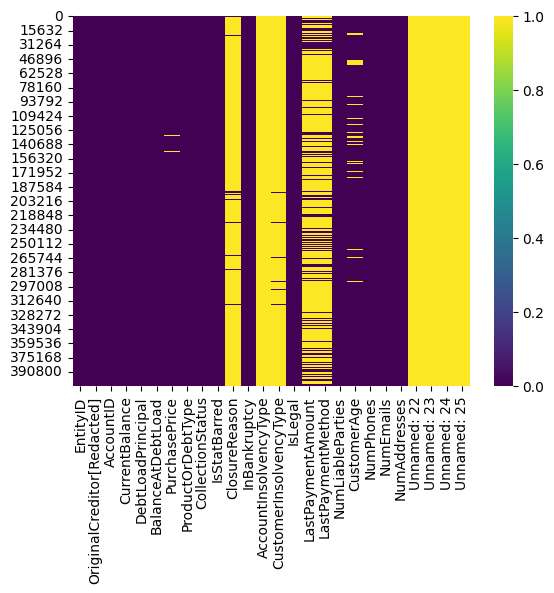

In [10]:
sns.heatmap(df.isnull(), cmap='viridis')

# Remove some column because of they contain null value more than 70%

In [11]:
df=df.drop(['LastPaymentAmount','LastPaymentMethod','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','CustomerInsolvencyType','AccountInsolvencyType',
          'ClosureReason'],axis=1)

# Checking Unique value

In [12]:
df.shape

(406423, 17)

In [13]:
col=df.columns
col

Index(['EntityID', 'OriginalCreditor[Redacted]', 'AccountID', 'CurrentBalance',
       'DebtLoadPrincipal', 'BalanceAtDebtLoad', 'PurchasePrice',
       'ProductOrDebtType', 'CollectionStatus', 'IsStatBarred', 'InBankruptcy',
       'IsLegal', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails',
       'NumAddresses'],
      dtype='object')

In [14]:
for i in  col:
    print(f'{i}:{df[i].unique()}')

EntityID:[     932      160     1504     2796     2691  6005173  2000666  3001032
  3001095  3010718  3001159  3010000  3010719  3010382  3010438  3010479
  3010574  3010575  3010601  3010600  5009101  3010639  3010643  3010645
  3010646  3010647  3010648  3010649  3010650  3010651  3010652  3010653
  3010654  3010657  3010662  3010684  3010686  3010685  3010793  3010831
  3010924  3010885  3010730  3010731  3010893  3011028  3011029  3010949
  3010948  6102901  6102900  3010990  6102960  3011002  3011010  3011020
  6102961  3011023  3011022  3010944  3011032  3011037  3011067  3011065
  3011066  3011068  3010785  3011124  3011125  3011126  3011127  3010703
  5009104  5009112  5009127  5009128  5009129  5009131  5009134  5009135
  5009136  5009138  5009139  5009140  5009145  5009146  5009149  5009151
  5009153  5009155  5009156  5009157  5009158  5009159  5009162  5009163
  5009164  5009167  5009169  5009173  5009174  5009176  5009177  5009178
  5009182  5009184  5009186  5009189  5009

In [15]:
df['PurchasePrice'].value_counts()

3.07     84764
2.32     39909
3.60     38075
7.38     34214
4.22     32402
5.72     24862
4.96     18870
6.59     17250
11.70    16655
4.31     16575
9.68     14477
5.34      8523
3.87      8449
9.41      8048
3.96      6536
8.15      4493
52.18     3783
15.31     3521
4.23      3373
1.84      2762
5.11      2281
10.95     1733
14.83     1542
6.31      1449
1.44      1327
25.41     1158
7.74       921
10.30      874
0.19       855
6.93       785
10.75      633
6.08       542
5.00       474
16.70      434
1.77       355
0.65       310
32.27      246
11.07      152
2.35       106
12.00        3
11.67        2
11.71        2
11.73        1
11.10        1
4.00         1
15.00        1
4.97         1
7.00         1
Name: PurchasePrice, dtype: int64

In [16]:
df['CustomerAge'].value_counts()

 38.0    14260
 37.0    13788
 39.0    13335
 36.0    12765
 40.0    12662
         ...  
 5.0         1
-6.0         1
-22.0        1
-4.0         1
-30.0        1
Name: CustomerAge, Length: 126, dtype: int64

In [17]:
df['NumLiableParties'].value_counts()

1.0    399494
2.0      6652
3.0       151
4.0         4
Name: NumLiableParties, dtype: int64

# NumLiableParties,CustomerAge,PurchasePrice contain nan

In [18]:
df['CustomerAge'].fillna(df['CustomerAge'].median(),inplace=True)
df['NumLiableParties'].fillna(df['NumLiableParties'].median(),inplace=True)
df['PurchasePrice'].fillna(df['PurchasePrice'].median(),inplace=True)

<Axes: >

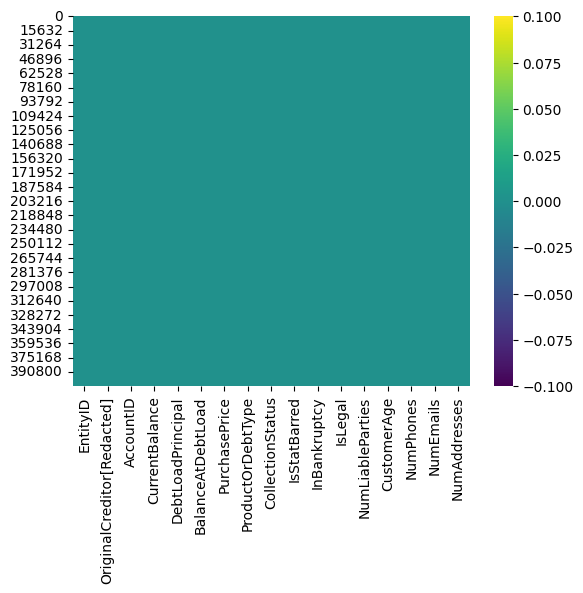

In [19]:
sns.heatmap(df.isnull(), cmap='viridis')

In [20]:
col=df.columns
col

Index(['EntityID', 'OriginalCreditor[Redacted]', 'AccountID', 'CurrentBalance',
       'DebtLoadPrincipal', 'BalanceAtDebtLoad', 'PurchasePrice',
       'ProductOrDebtType', 'CollectionStatus', 'IsStatBarred', 'InBankruptcy',
       'IsLegal', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails',
       'NumAddresses'],
      dtype='object')

In [21]:
df['CustomerAge']

0         53.0
1         44.0
2         44.0
3         44.0
4         46.0
          ... 
406418    36.0
406419    37.0
406420    71.0
406421    38.0
406422    30.0
Name: CustomerAge, Length: 406423, dtype: float64

# Checking Outliers

<Axes: >

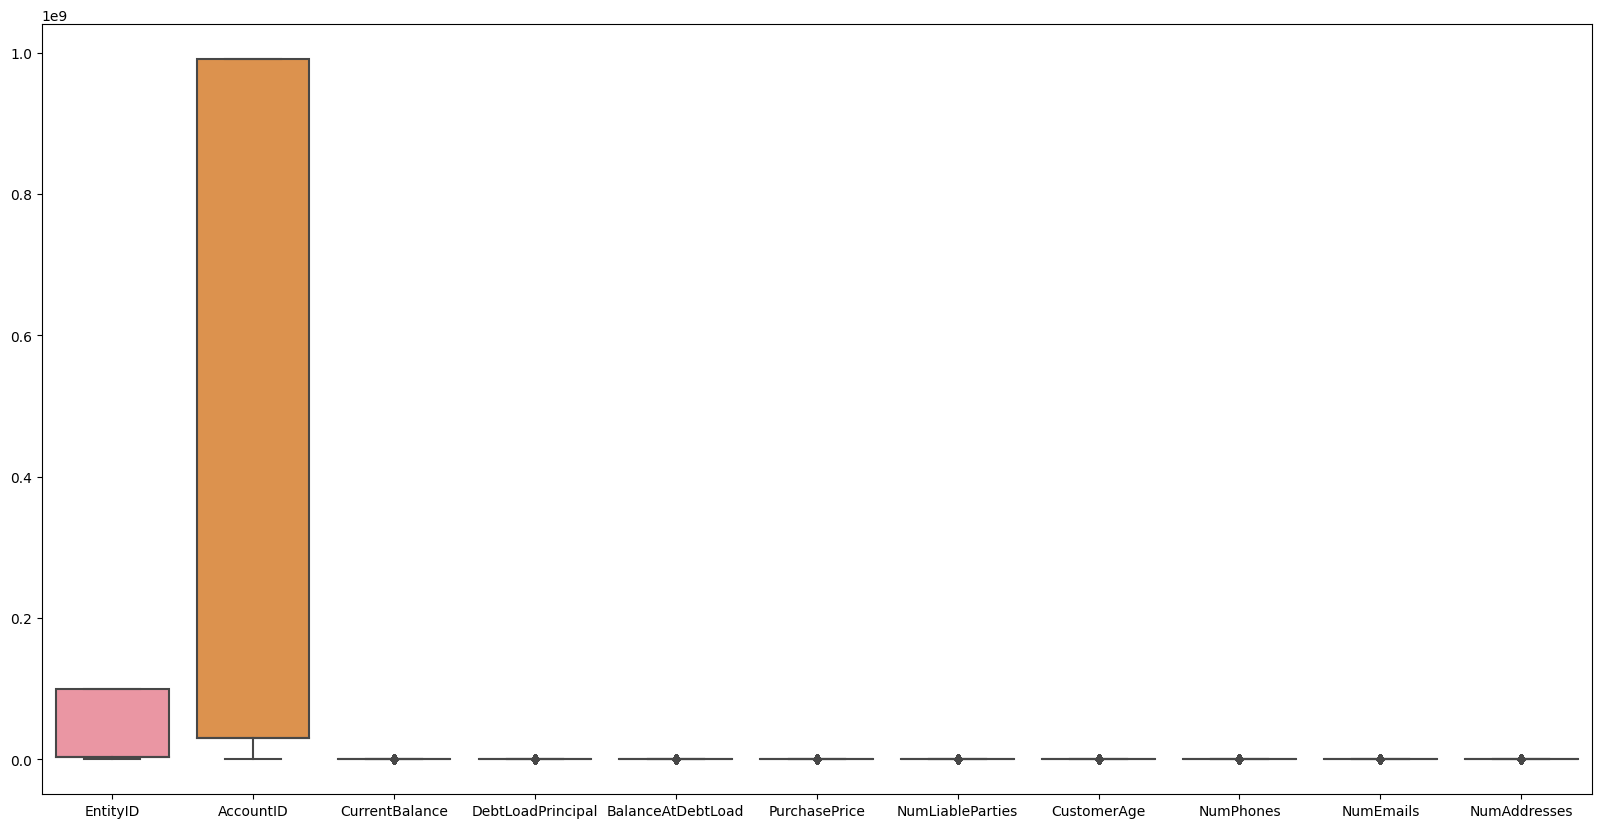

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

# 5.Exploratory Data Analysis

In [23]:
df.shape

(406423, 17)

In [24]:
# Extract object columns
object_columns = df.select_dtypes(include=['object']).columns

In [25]:
object_columns

Index(['OriginalCreditor[Redacted]', 'ProductOrDebtType', 'CollectionStatus',
       'IsStatBarred', 'InBankruptcy', 'IsLegal'],
      dtype='object')

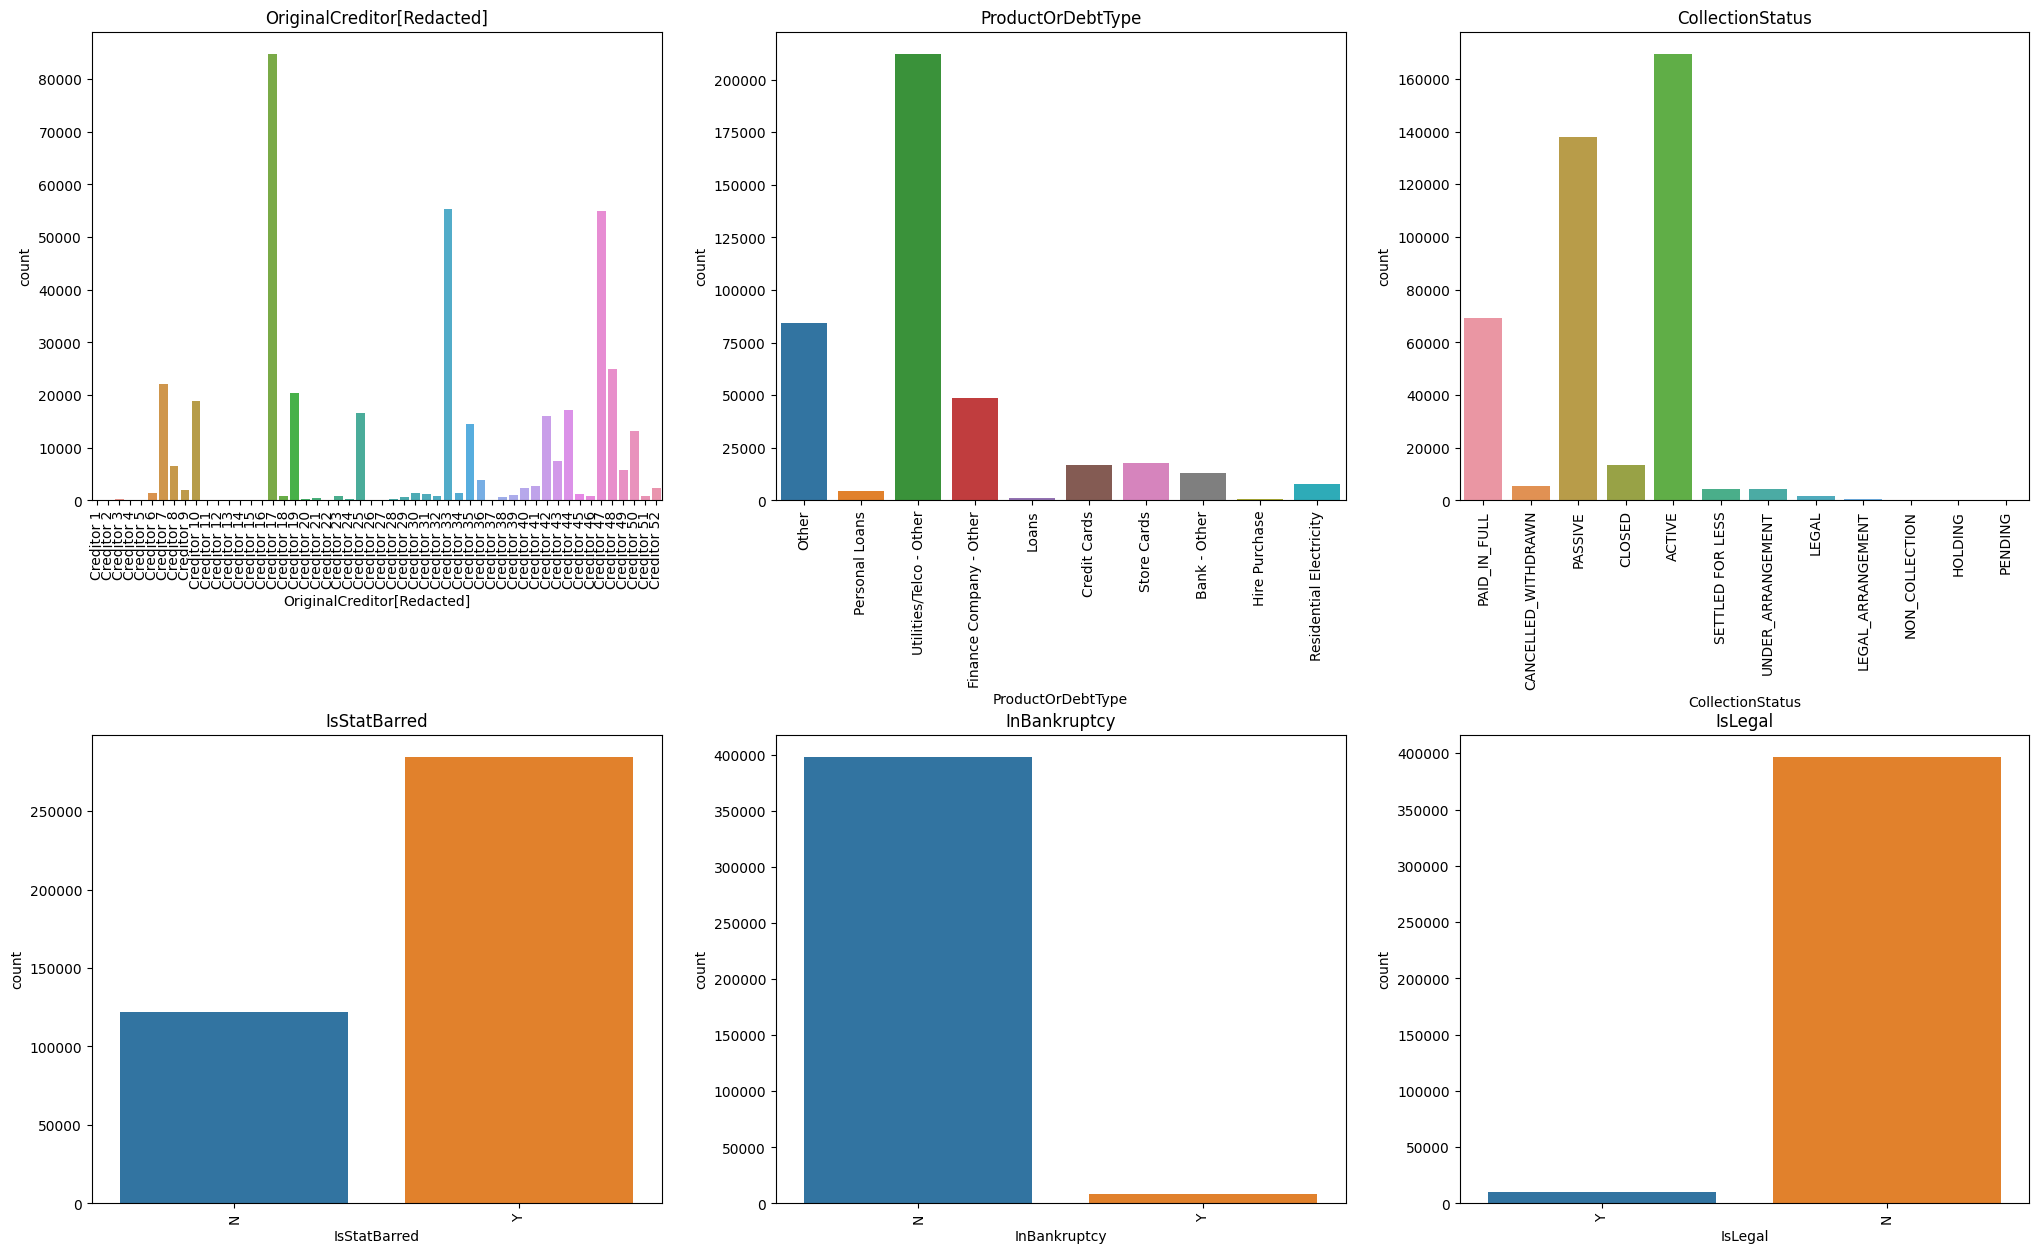

In [26]:
plt.figure(figsize=(25, 70))
plt.subplots_adjust(hspace=.5, wspace=.2)

for i in range(len(object_columns)):
    plt.subplot(8, 3, i+1)
    plt.xticks(rotation=90)
    sns.countplot(data=df, x=object_columns[i])
    plt.title(object_columns[i])
plt.show()

In [27]:
df.head(1)

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,932,Creditor 1,3677,0.0,1160.2,1160.2,4.22,Other,PAID_IN_FULL,N,N,Y,1.0,53.0,0,0,1


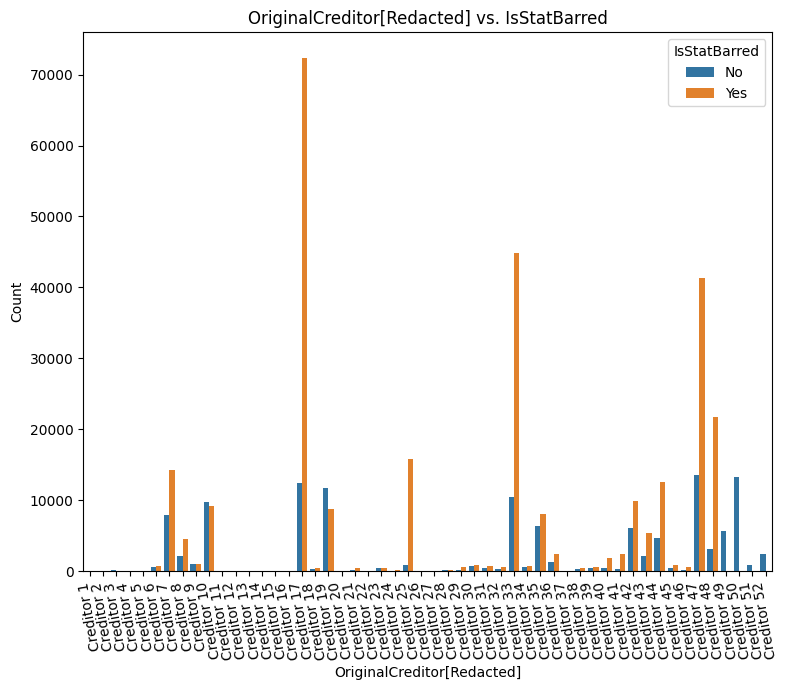

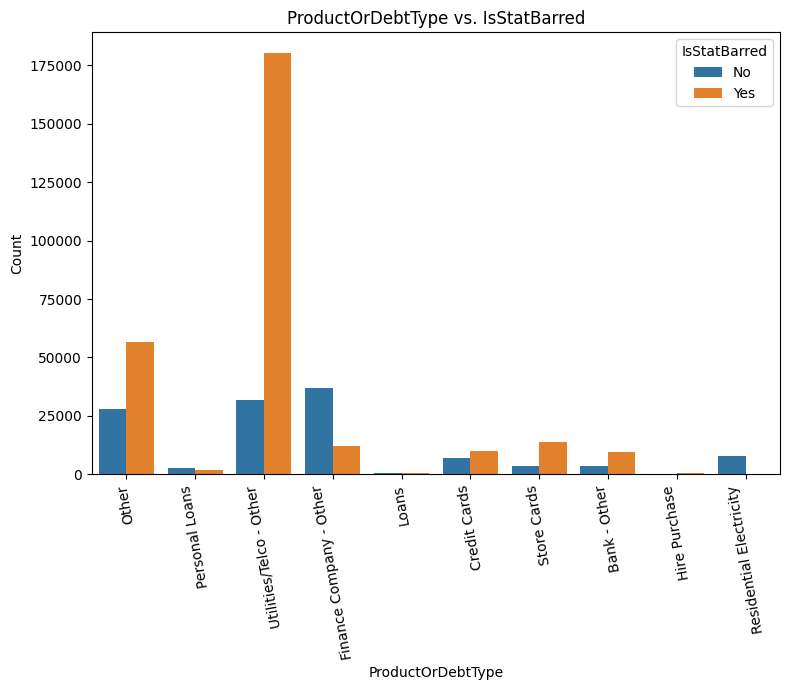

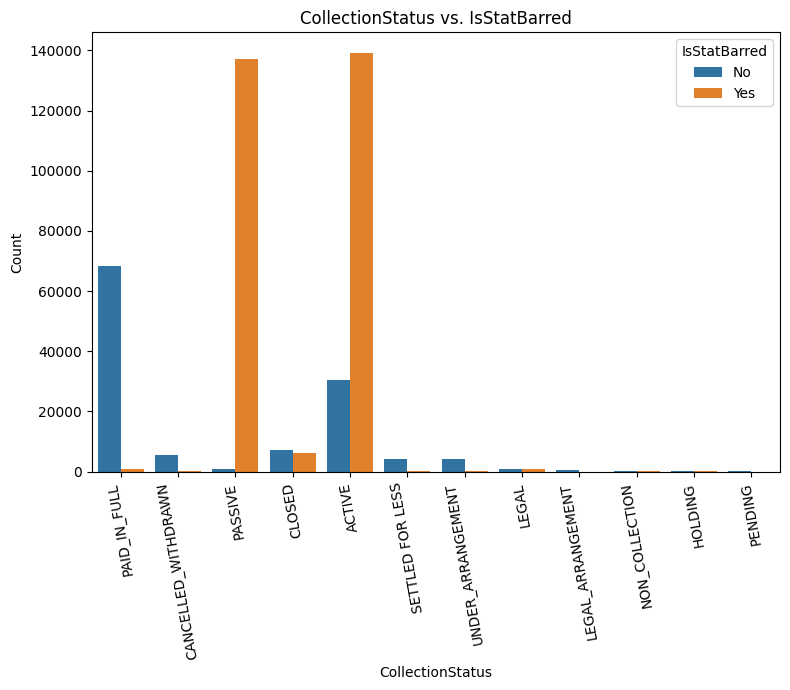

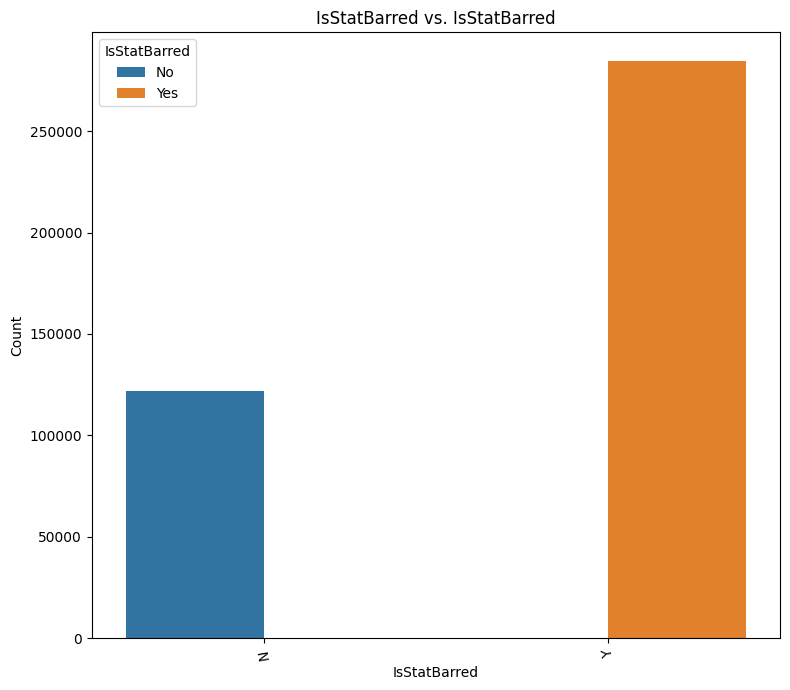

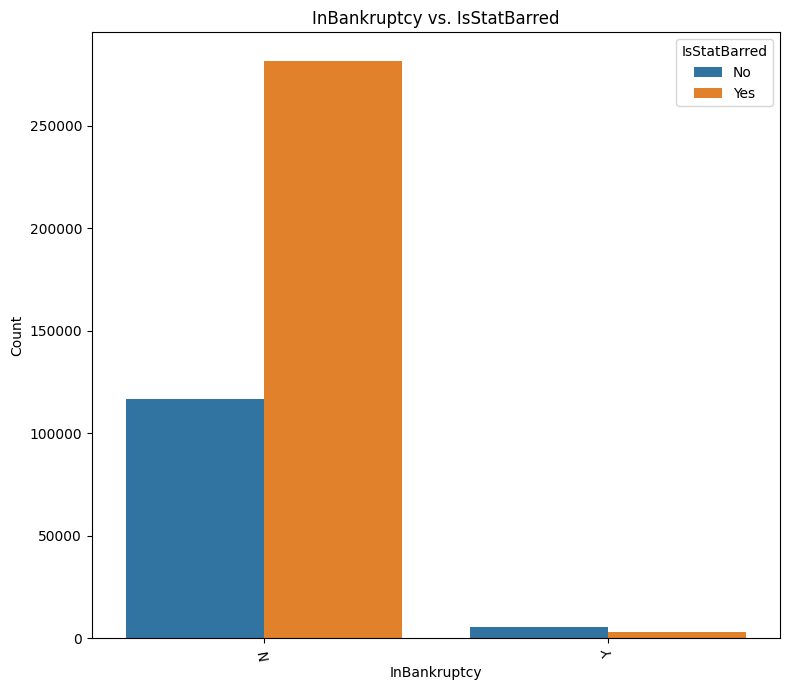

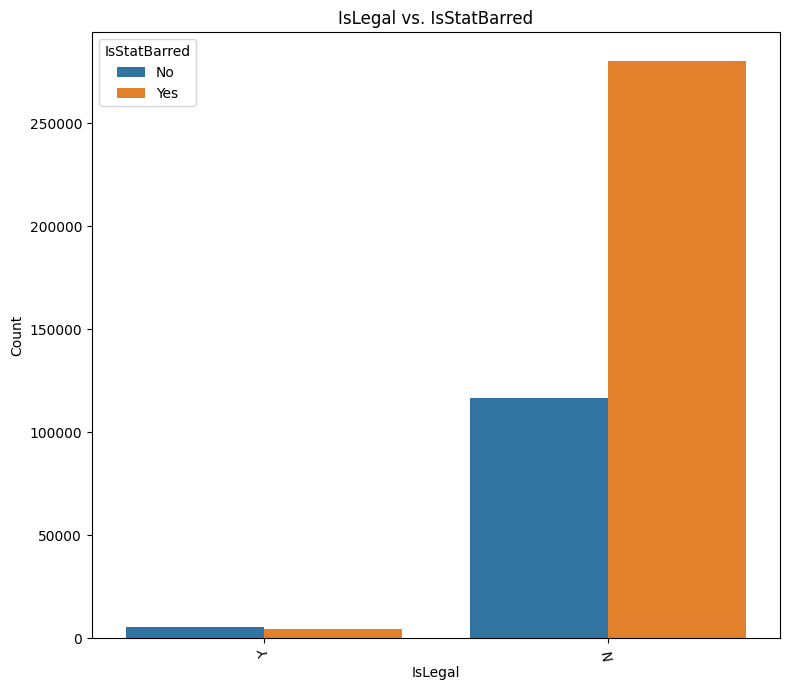

In [28]:
for feature in object_columns:
    plt.figure(figsize=(8, 7))
    sns.countplot(x=feature, hue='IsStatBarred', data=df)
    plt.title(f'{feature} vs. IsStatBarred')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='IsStatBarred', labels=['No', 'Yes'])
    plt.xticks(rotation=100)
    plt.tight_layout()
    plt.show()

#Conclusion

1. **Original Creditors:** We noticed that Creditor 17, Creditor 33, and Creditor 47 are the most common creditors in the dataset. It seems that they have many accounts that might be challenging to collect due to legal reasons.

2. **Types of Debts:** Some types of debts, like "Utilities/Telco-other" and "Other," are more likely to be difficult to collect because of legal rules.

3. **Collection Status:** Many accounts are in either "Passive" or "Active" collection status, and quite a few of these are affected by legal issues. This makes them harder to collect.

4. **Bankruptcy:** Some accounts have "Bankruptcy" associated with them. Even accounts without bankruptcy can still be affected by legal problems, making collection efforts tougher.

5. **Legal Actions:** Many accounts don't have legal actions associated with them, but they can still face legal challenges. So, it's crucial to handle them carefully.

The data shows that certain creditors, debt types, collection statuses, and legal statuses are linked to accounts that may be challenging to collect due to legal restrictions. These insights are important for creating better strategies for debt collection, managing accounts at different stages, and ensuring compliance with the law. Developing effective strategies for these specific cases, particularly considering different creditors and debt types, can lead to better debt collection outcomes.

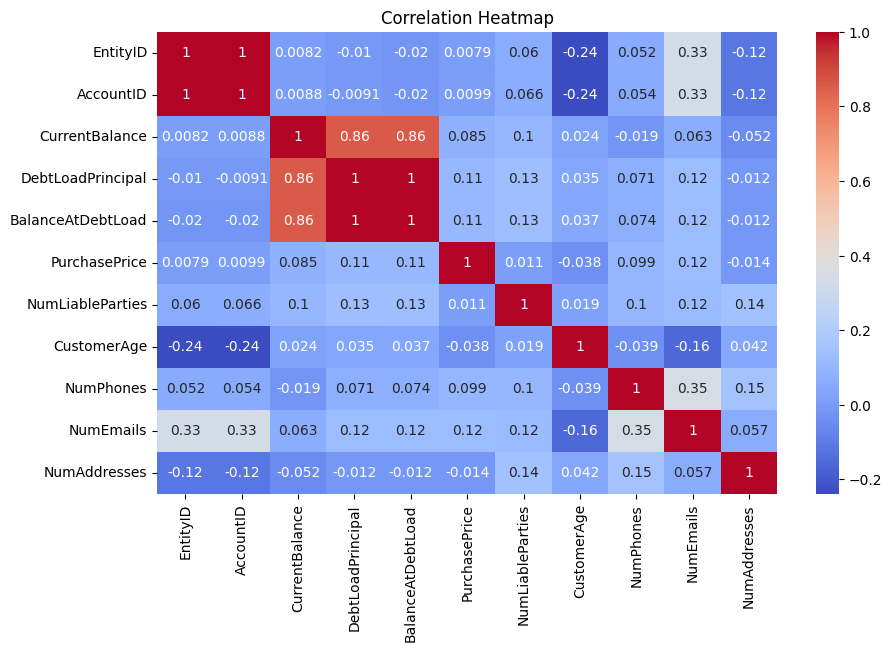

In [29]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
# Entity ID and Account ID are highly correlated
# Debt Load Principle and Current balance are high correlated
# Balance at Debt load and current balance are high correlated
# now we delete 1 columns

In [31]:
df.drop(['EntityID','DebtLoadPrincipal','CurrentBalance'],axis=1,inplace=True)

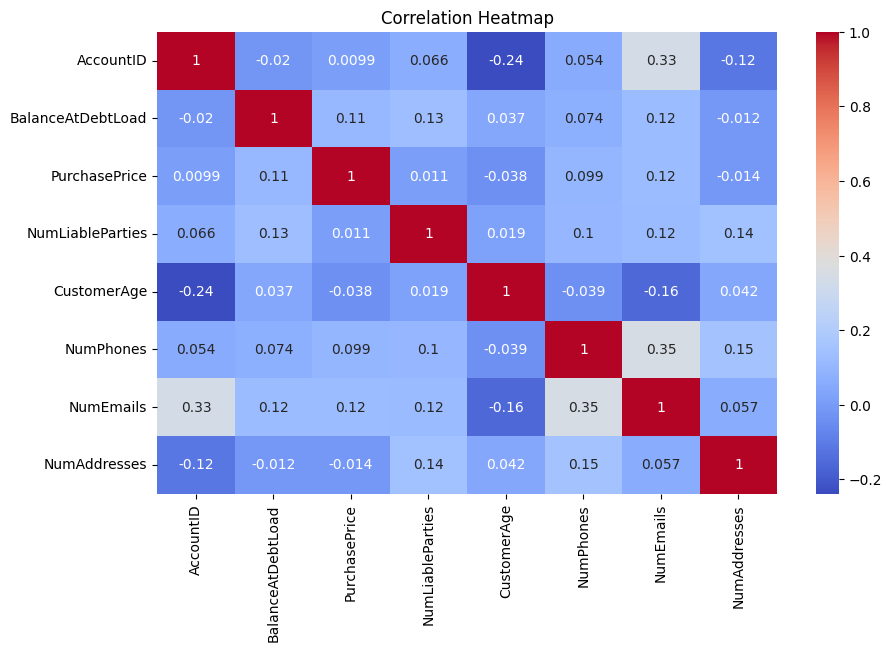

In [32]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
df.head(1)

,OriginalCreditor[Redacted],AccountID,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,Creditor 1,3677,1160.2,4.22,Other,PAID_IN_FULL,N,N,Y,1.0,53.0,0,0,1


#Data Encoding



In [35]:
df['IsStatBarred']=df['IsStatBarred'].map({'Y':1,'N':0})

In [36]:
df.head()

,OriginalCreditor[Redacted],AccountID,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,Creditor 1,3677,1160.20,4.22,Other,PAID_IN_FULL,0,N,Y,1.0,53.0,0,0,1
1,Creditor 2,4276,182.90,4.22,Other,CANCELLED_WITHDRAWN,1,N,N,1.0,44.0,0,0,1
2,Creditor 1,8525,538.57,4.22,Other,PAID_IN_FULL,0,N,N,1.0,44.0,1,0,1
3,Creditor 2,9859,8279.50,4.22,Other,PASSIVE,1,N,N,1.0,44.0,1,0,1
4,Creditor 1,12807,523.00,4.22,Other,PAID_IN_FULL,1,N,Y,1.0,46.0,2,0,1


In [37]:
df.shape

(406423, 14)

In [38]:
df=pd.get_dummies(df)

In [39]:
df.head()

,AccountID,BalanceAtDebtLoad,PurchasePrice,IsStatBarred,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,OriginalCreditor[Redacted]_Creditor 1,...,CollectionStatus_NON_COLLECTION,CollectionStatus_PAID_IN_FULL,CollectionStatus_PASSIVE,CollectionStatus_PENDING,CollectionStatus_SETTLED FOR LESS,CollectionStatus_UNDER_ARRANGEMENT,InBankruptcy_N,InBankruptcy_Y,IsLegal_N,IsLegal_Y
0,3677,1160.20,4.22,0,1.0,53.0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
1,4276,182.90,4.22,1,1.0,44.0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,8525,538.57,4.22,0,1.0,44.0,1,0,1,1,...,0,1,0,0,0,0,1,0,1,0
3,9859,8279.50,4.22,1,1.0,44.0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,12807,523.00,4.22,1,1.0,46.0,2,0,1,1,...,0,1,0,0,0,0,1,0,0,1


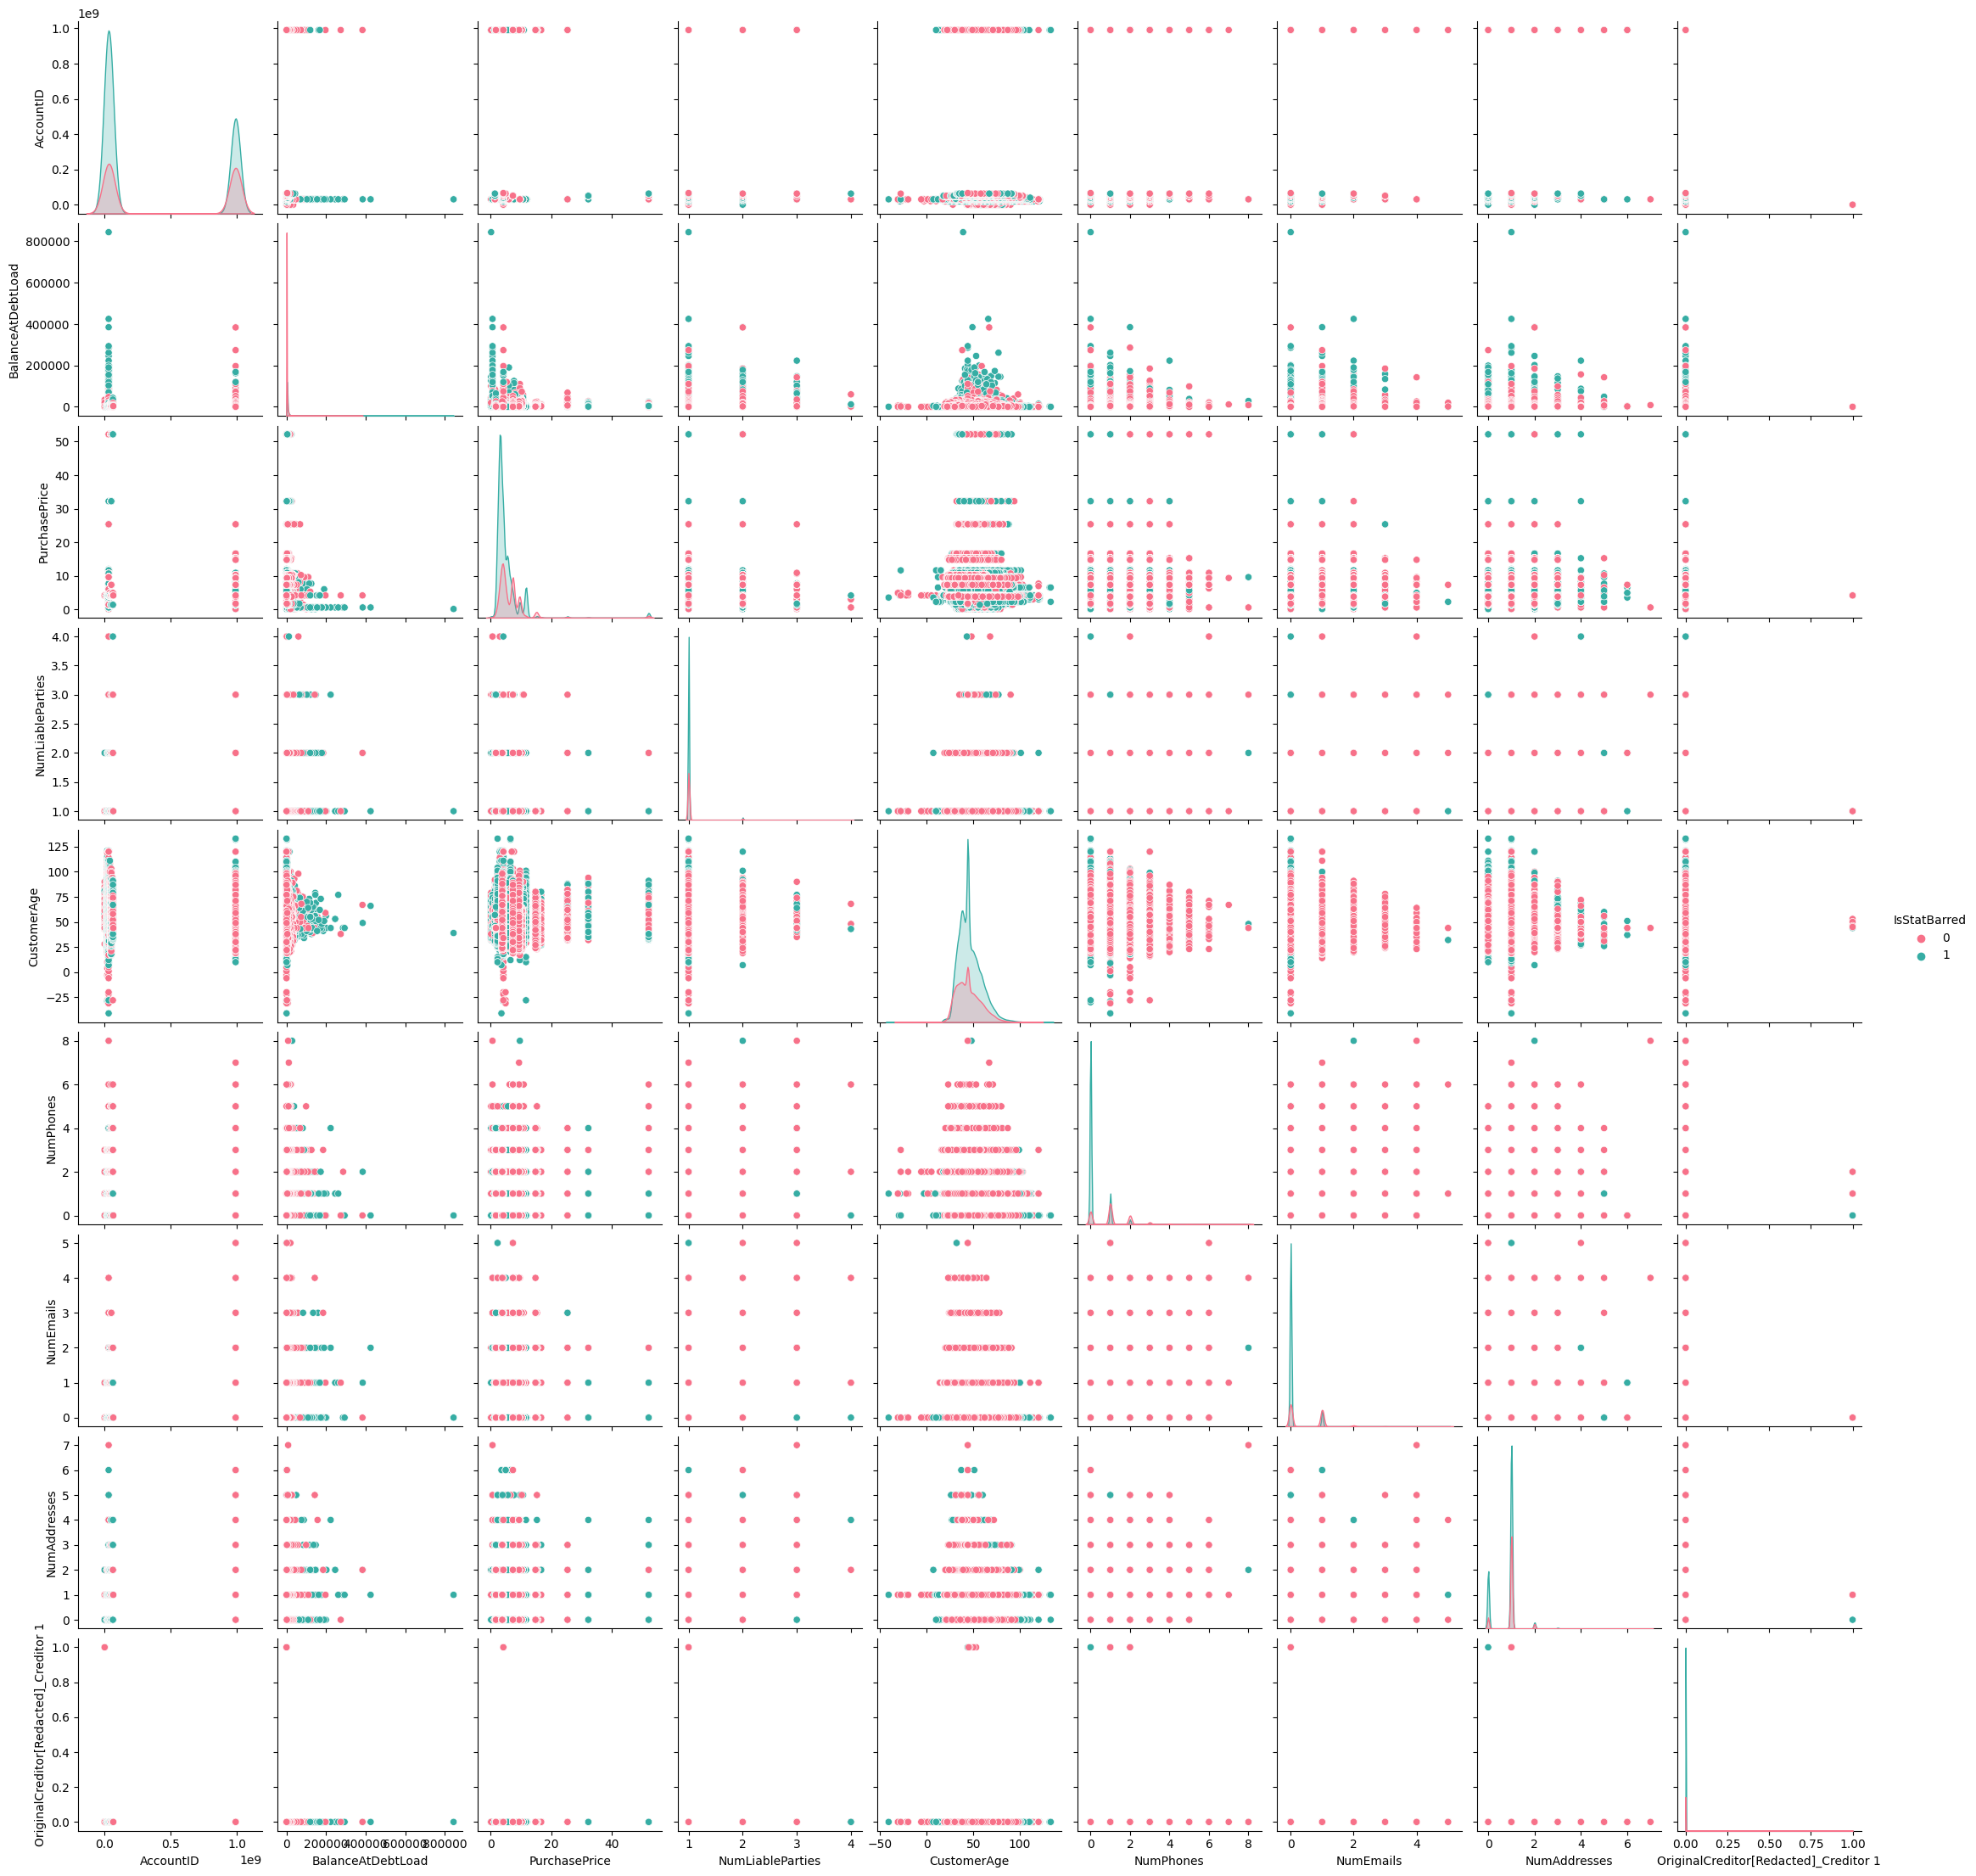

In [40]:
columns_to_visualize = [
    'AccountID', 'BalanceAtDebtLoad', 'PurchasePrice', 'IsStatBarred',
    'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails',
    'NumAddresses', 'OriginalCreditor[Redacted]_Creditor 1',
]
sns.pairplot(df[columns_to_visualize], hue='IsStatBarred', palette='husl')
plt.show()

In [41]:
df.shape

(406423, 87)

In [42]:
X=df.drop(['IsStatBarred'],axis=1)
y=df['IsStatBarred']

#Data Scaling/Normalization

In [43]:
scaler = MinMaxScaler()

In [44]:
X_scaled_data = scaler.fit_transform(X)

In [45]:
X_scaled_data

array([[0.00000000e+00, 1.37408612e-03, 7.75149067e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.04749859e-07, 2.16618128e-04, 7.75149067e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.89453643e-06, 6.37856890e-04, 7.75149067e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [9.99999998e-01, 4.16015766e-03, 1.38295826e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99999999e-01, 5.30271466e-03, 1.38295826e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.22842731e-04, 1.38295826e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

#6.Data Splitting

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size=0.20, random_state=42)

In [47]:
X_train.shape

(325138, 86)

In [48]:
y_train.shape

(325138,)

#7.Using Model

In [54]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gbc=GradientBoostingClassifier()
gnb=GaussianNB()
abc=AdaBoostClassifier()
xgb=xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

In [55]:
for model in [lr,dt,rf,knn,gbc,gnb,abc,xgb]:
    print('************************************************************************',model)
    fit=model.fit(X_train,y_train)
    Y_pred_train=fit.predict(X_train)
    Y_pred_test=fit.predict(X_test)
    As_train=accuracy_score(Y_pred_train,y_train)
    As_test=accuracy_score(Y_pred_test,y_test)
    cm=confusion_matrix(Y_pred_test,y_test)
    cr=classification_report(Y_pred_test,y_test)





    print("training Accuracy score \n" ,As_train)
    print("=========="*3)
    print("testing Accuracy score \n" ,As_test)
    print("=========="*3)
    print("Confusion matrix \n" ,cm)
    print("=========="*3)
    print("CLASSIFICATION REPORT \n" ,cr)
    print("=========="*3)
    #print("ROC AUC \n" ,ROC)
    print("=========="*3)

************************************************************************ LogisticRegression()
training Accuracy score 
 0.9638830281295943
testing Accuracy score 
 0.962932890447192
Confusion matrix 
 [[22164   868]
 [ 2145 56108]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94     23032
           1       0.98      0.96      0.97     58253

    accuracy                           0.96     81285
   macro avg       0.95      0.96      0.96     81285
weighted avg       0.96      0.96      0.96     81285

************************************************************************ DecisionTreeClassifier()
training Accuracy score 
 0.9999907731486323
testing Accuracy score 
 0.9560558528633819
Confusion matrix 
 [[22527  1790]
 [ 1782 55186]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     24317
           1       0.97      0.97      0.97    

#Voting Classifier

In [57]:
from sklearn.metrics import f1_score

In [59]:
voting_clf = VotingClassifier(estimators=[('lr', lr), ('dc', dt),('knn',knn),('rf',rf),('gbm_classifier',gbc),('GaussianNB',gnb)],voting='hard')

In [60]:
voting_clf.fit(X_train,y_train)
y_pred_train=voting_clf.predict(X_train)
y_pred_test=voting_clf.predict(X_test)
Accuracy_as_per_train_voting=accuracy_score(y_train,y_pred_train)
Accuracy_as_per_test_voting=accuracy_score(y_test,y_pred_test)
Classification_report=classification_report(y_test,y_pred_test)
Confusion_mat=confusion_matrix(y_test,y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print('F1-Score:', f1)
print('Accuracy as per y_pred_train ',Accuracy_as_per_train_voting)
print('****************************'*3)
print('Accuracy as per y_pred_test ',Accuracy_as_per_test_voting)
print('****************************'*3)
print('Classification Report \n ',Classification_report)
print('****************************'*3)
print('Confusion Matrix \n',Confusion_mat)

F1-Score: 0.9785271527335816
Accuracy as per y_pred_train  0.9797409100135942
************************************************************************************
Accuracy as per y_pred_test  0.9696992064956634
************************************************************************************
Classification Report 
                precision    recall  f1-score   support

           0       0.96      0.93      0.95     24309
           1       0.97      0.98      0.98     56976

    accuracy                           0.97     81285
   macro avg       0.97      0.96      0.96     81285
weighted avg       0.97      0.97      0.97     81285

************************************************************************************
Confusion Matrix 
 [[22702  1607]
 [  856 56120]]


# Graphically representation of Accuracy

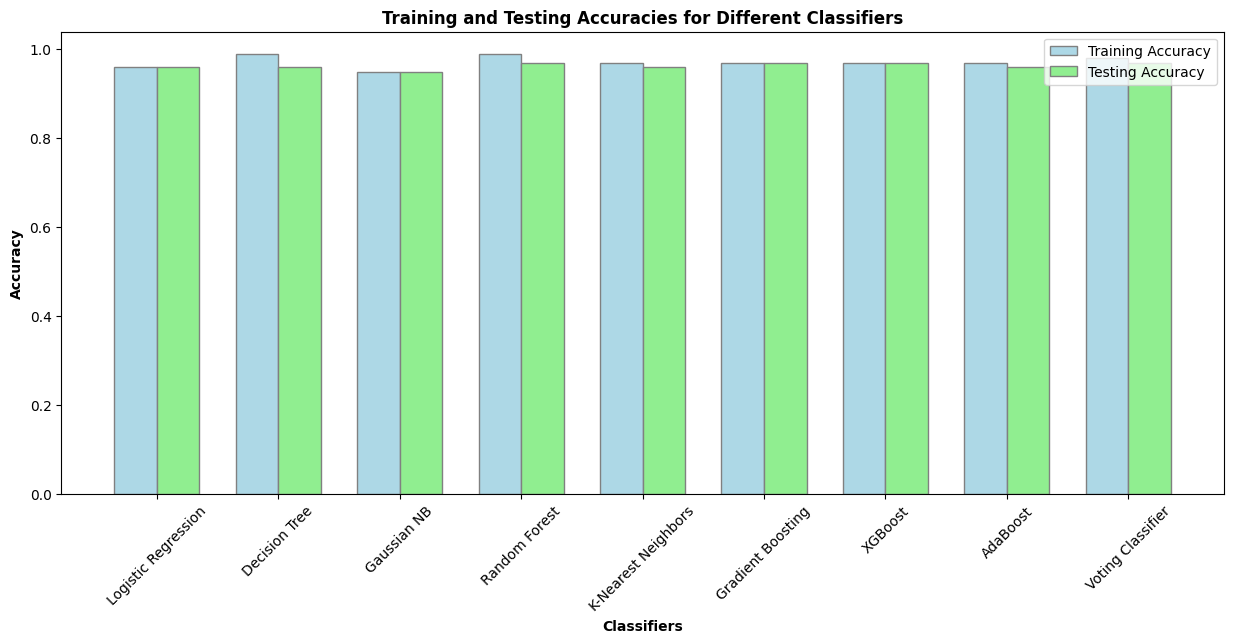

In [67]:
classifiers = ['Logistic Regression', 'Decision Tree', 'Gaussian NB', 'Random Forest', 'K-Nearest Neighbors', 'Gradient Boosting', 'XGBoost', 'AdaBoost', 'Voting Classifier']
training_accuracies = [0.96, 0.99, 0.95, 0.99, 0.97, 0.97, 0.97, 0.97, 0.98]
testing_accuracies = [0.96, 0.96, 0.95, 0.97, 0.96, 0.97, 0.97, 0.96, 0.97]
plt.figure(figsize=(15, 6))
bar_width = 0.35
r1 = range(len(classifiers))
r2 = [x + bar_width for x in r1]
plt.bar(r1, training_accuracies, color='lightblue', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r2, testing_accuracies, color='lightgreen', width=bar_width, edgecolor='grey', label='Testing Accuracy')
plt.xlabel('Classifiers', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in r1], classifiers, rotation=45)
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Training and Testing Accuracies for Different Classifiers', fontweight='bold')
plt.legend()
plt.show()


#Conclusion

#Random Forest Classifier ------------    #Voting Classifier
#Training Accuracy: 99.67%  ------------   #Training Accuracy: 97.97%
#Testing Accuracy: 97.08%   ------------   #Testing Accuracy: 97.0%
#F1-Score: 0.97            ------------    #F1-Score: 0.98


#The Voting Classifier slightly outperforms the Random Forest Classifier in terms of F1-Score, making it the preferable choice for this classification task. However, the Random Forest Classifier is also a strong contender.